In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('F:/IIIT Bhubaneswar/ML/projects/project (2) (codeBasics)/sportsPersonClassifier/model/test images/1.jpg')
img.shape

(498, 332, 3)

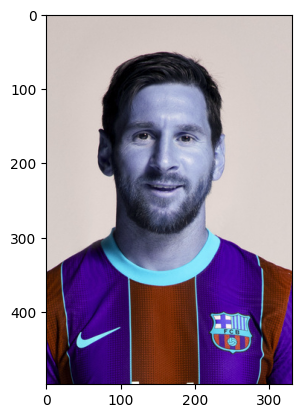

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(498, 332)

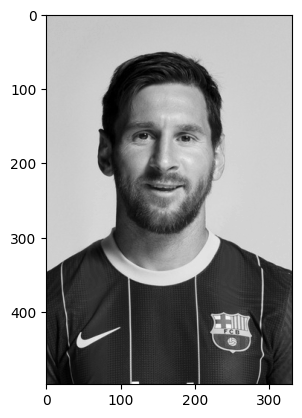

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('F:/IIIT Bhubaneswar/ML/projects/project (2) (codeBasics)/sportsPersonClassifier/model/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('F:/IIIT Bhubaneswar/ML/projects/project (2) (codeBasics)/sportsPersonClassifier/model/opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 80, 102, 162, 162]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(80, 102, 162, 162)

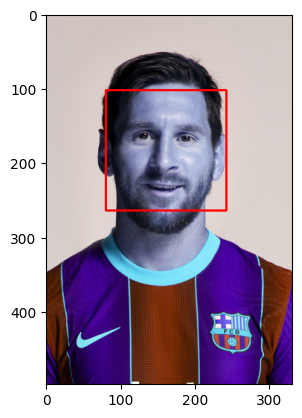

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

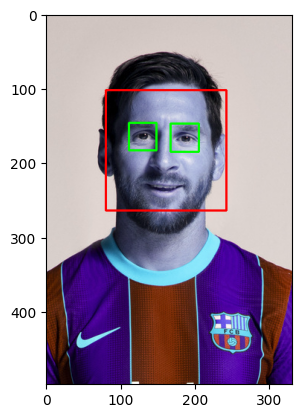

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

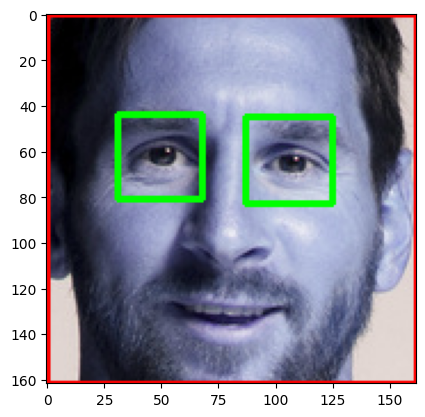

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

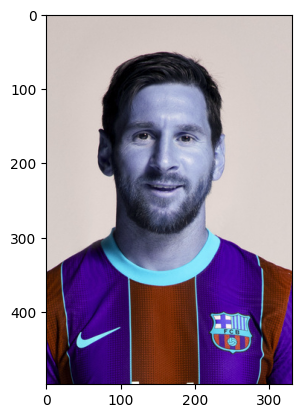

In [12]:
original_image = cv2.imread('F:/IIIT Bhubaneswar/ML/projects/project (2) (codeBasics)/sportsPersonClassifier/model/test images/1.jpg')
plt.imshow(original_image)

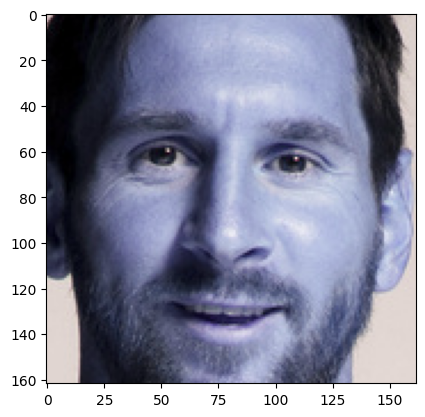

In [13]:
cropped_image = get_cropped_image_if_2_eyes('F:/IIIT Bhubaneswar/ML/projects/project (2) (codeBasics)/sportsPersonClassifier/model/test images/1.jpg')
plt.imshow(cropped_image)

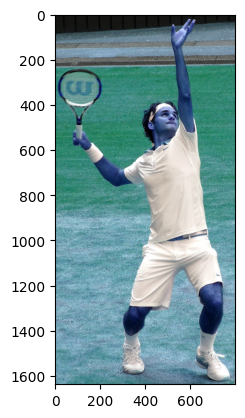

In [14]:
org_image_obstructed = cv2.imread('F:/IIIT Bhubaneswar/ML/projects/project (2) (codeBasics)/sportsPersonClassifier/model/test images/3.jpg')
plt.imshow(org_image_obstructed)

In [15]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('F:/IIIT Bhubaneswar/ML/projects/project (2) (codeBasics)/sportsPersonClassifier/model/test images/3.jpg')
cropped_image_no_2_eyes

In [16]:
path_to_data = "F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset"
path_to_cr_data = "F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped/"


In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset\\cropped',
 'F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset\\lionel messi',
 'F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset\\maria sharapova',
 'F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset\\roger federer',
 'F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset\\serena williams',
 'F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset\\virat kohli']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
'''cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   ''' 

'cropped_image_dirs = []\ncelebrity_file_names_dict = {}\n\nfor img_dir in img_dirs:\n    count = 1\n    celebrity_name = img_dir.split(\'/\')[-1]\n    print(celebrity_name)\n    \n    celebrity_file_names_dict[celebrity_name] = []\n    \n    for entry in os.scandir(img_dir):\n        roi_color = get_cropped_image_if_2_eyes(entry.path)\n        if roi_color is not None:\n            cropped_folder = path_to_cr_data + celebrity_name\n            if not os.path.exists(cropped_folder):\n                os.makedirs(cropped_folder)\n                cropped_image_dirs.append(cropped_folder)\n                print("Generating cropped images in folder: ",cropped_folder)\n                \n            cropped_file_name = celebrity_name + str(count) + ".png"\n            cropped_file_path = cropped_folder + "/" + cropped_file_name \n            \n            cv2.imwrite(cropped_file_path, roi_color)\n            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)\n            cou

In [21]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [22]:
cropped_img = np.array(roi_color)
cropped_img.shape

(162, 162, 3)

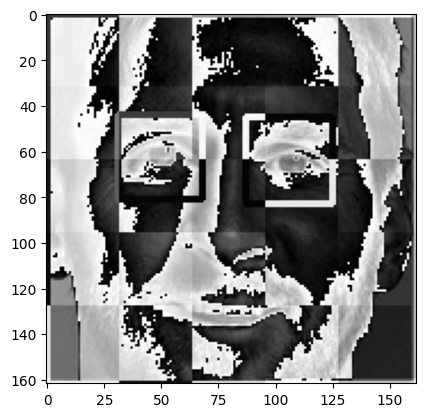

In [23]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [24]:
celebrity_file_names_dict={'lionel messi':["F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi1.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi2.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi3.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi4.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi5.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi6.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi7.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi8.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi9.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi10.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi11.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi12.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi13.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi14.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi15.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi16.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi17.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi18.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi19.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi20.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi21.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi22.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi23.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi24.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi25.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi26.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi27.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi28.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi29.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi30.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi31.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi32.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi33.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi34.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//lionel messi//lionel messi35.png"]
,'maria sharapova':["F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova1.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova2.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova3.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova4.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova5.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova6.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova7.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova8.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova9.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova10.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova11.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova12.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova13.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova14.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova15.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova16.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova17.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova18.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova19.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova20.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova21.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova22.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova23.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova24.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova25.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova26.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova27.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova28.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova29.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova30.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova31.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova32.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova33.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova34.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova35.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova36.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//maria sharapova//maria sharapova37.png"],
'roger federer':["F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer1.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer2.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer3.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer4.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer5.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer6.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer7.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer8.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer9.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer10.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer11.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer12.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer13.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer14.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer15.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer16.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer17.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer18.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer19.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer20.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer21.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer22.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer23.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer24.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//roger federer//roger federer25.png"],
'serena williams':["F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams1.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams2.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams3.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams4.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams5.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams6.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams7.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams8.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams9.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams10.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams11.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams12.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams13.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams14.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams15.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams16.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams17.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams18.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams19.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams20.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams21.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams22.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams23.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifie//model//dataset//cropped//serena williams//serena williams24.png"],
'virat kohli':["F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//virat kohli//virat kohli1.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//virat kohli//virat kohli2.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//virat kohli//virat kohli3.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//virat kohli//virat kohli4.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//virat kohli//virat kohli5.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//virat kohli//virat kohli6.png"
,"F://IIIT Bhubaneswar//ML//projects//project (2) (codeBasics)//sportsPersonClassifier//model//dataset//cropped//virat kohli//virat kohli7.png"]}

In [25]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel messi': 0,
 'maria sharapova': 1,
 'roger federer': 2,
 'serena williams': 3,
 'virat kohli': 4}

In [26]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
          continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [27]:
len(X[0])

IndexError: list index out of range

In [28]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(0, 4096)

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
best_estimators

In [ ]:
best_estimators['svm'].score(X_test,y_test)

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

In [ ]:
import joblib
import json

In [ ]:
'''!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, '/content/drive/MyDrive/Data Science Projects (Datasets).pkl') '''

In [ ]:
'''import json
with open("/content/drive/MyDrive/Data Science Projects (Datasets)/class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))'''